<h1>All Respondents Analysis with Grades</h1>

<h2>Read All Respondents Data</h2>

In [1]:
import os
import pandas as pd

# Specify the folder path where the CSV files are located
folder_path = "../all respondents data"

# Respondents to include in the combined data
respondents = ["002", "003", "004", "005", "006", "007"]

# Initialize an empty dataframe to store the combined data
combined_data = pd.DataFrame()

# Loop through each file in the folder with .csv extension and append to the combined_data dataframe
for filename in os.listdir(folder_path):
    if filename.endswith(".csv") and any(respondent in filename for respondent in respondents):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path, low_memory=False)
        respondent_num = filename.split('_')[0]  # Get the first part of the filename before the first '_'
        df['Respondent'] = respondent_num  # Add a new column with the respondent number
        combined_data = pd.concat([combined_data, df])

columns_to_remove = ['Row','Timestamp','EventSource','SlideEvent','StimType','Duration',
                     'CollectionPhase','SourceStimuliName','EventSource','SampleNumber','EventSource.1',
                     'Blink', 'BlinkRate', 'EventSource.2', 'ET_TimeSignal', 'EventSource.3']
combined_data.drop(columns_to_remove, axis=1, inplace=True)

# Print the combined data
print(combined_data)


           Anger  Contempt   Disgust      Fear       Joy    Sadness  Surprise  \
0            NaN       NaN       NaN       NaN       NaN        NaN       NaN   
1            NaN       NaN       NaN       NaN       NaN        NaN       NaN   
2            NaN       NaN       NaN       NaN       NaN        NaN       NaN   
3            NaN       NaN       NaN       NaN       NaN        NaN       NaN   
4            NaN       NaN       NaN       NaN       NaN        NaN       NaN   
...          ...       ...       ...       ...       ...        ...       ...   
134009       NaN       NaN       NaN       NaN       NaN        NaN       NaN   
134010  0.509117  0.211371  0.599302  0.142254  0.024453  17.279713  0.058270   
134011  0.513741  0.210995  0.588300  0.140206  0.024428  17.162191  0.057743   
134012       NaN       NaN       NaN       NaN       NaN        NaN       NaN   
134013       NaN       NaN       NaN       NaN       NaN        NaN       NaN   

        Engagement    Valen

In [2]:
import pandas as pd

# Read in the Grades.csv file
grades_df = pd.read_csv('Grades.csv')

# Remove the trailing underscore from the "Respondent" column in the grades_df dataframe
grades_df['Respondent'] = grades_df['Respondent'].str.rstrip('_')

# Merge the combined_data and grades_df dataframes based on the "Respondent" column
combined_data_with_grades = pd.merge(combined_data, grades_df[['Respondent', 'Grade']], on='Respondent')

# Print the resulting dataframe with the added "Grade" column
print(combined_data_with_grades)


           Anger  Contempt   Disgust      Fear       Joy    Sadness  Surprise  \
0            NaN       NaN       NaN       NaN       NaN        NaN       NaN   
1            NaN       NaN       NaN       NaN       NaN        NaN       NaN   
2            NaN       NaN       NaN       NaN       NaN        NaN       NaN   
3            NaN       NaN       NaN       NaN       NaN        NaN       NaN   
4            NaN       NaN       NaN       NaN       NaN        NaN       NaN   
...          ...       ...       ...       ...       ...        ...       ...   
388079       NaN       NaN       NaN       NaN       NaN        NaN       NaN   
388080  0.509117  0.211371  0.599302  0.142254  0.024453  17.279713  0.058270   
388081  0.513741  0.210995  0.588300  0.140206  0.024428  17.162191  0.057743   
388082       NaN       NaN       NaN       NaN       NaN        NaN       NaN   
388083       NaN       NaN       NaN       NaN       NaN        NaN       NaN   

        Engagement    Valen

In [3]:
print(combined_data_with_grades.columns)

Index(['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Engagement', 'Valence', 'Sentimentality', 'Confusion', 'Neutral',
       'Attention', 'Brow Furrow', 'Brow Raise', 'Cheek Raise', 'Chin Raise',
       'Dimpler', 'Eye Closure', 'Eye Widen', 'Inner Brow Raise', 'Jaw Drop',
       'Lip Corner Depressor', 'Lip Press', 'Lip Pucker', 'Lip Stretch',
       'Lip Suck', 'Lid Tighten', 'Mouth Open', 'Nose Wrinkle', 'Smile',
       'Smirk', 'Upper Lip Raise', 'Pitch', 'Yaw', 'Roll',
       'Interocular Distance', 'ET_PupilLeft', 'ET_PupilRight',
       'ET_DistanceLeft', 'ET_DistanceRight', 'ET_GazeLeftx', 'ET_GazeLefty',
       'ET_GazeRightx', 'ET_GazeRighty', 'ET_ValidityLeftEye',
       'ET_ValidityRightEye', 'ET_CameraLeftX', 'ET_CameraLeftY',
       'ET_CameraRightX', 'ET_CameraRightY', 'Gaze X', 'Gaze Y',
       'Interpolated Gaze X', 'Interpolated Gaze Y', 'Interpolated Distance',
       'Gaze Velocity', 'Gaze Acceleration', 'Fixation Index',
       'Fix

<h2>Facial Expressions Analysis</h2>

<h3>Data Pre-processing</h3>

In [4]:
import pandas as pd

facial_expressions_columns = ['Respondent', 'Grade','Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Engagement', 'Valence', 'Sentimentality', 'Confusion', 'Neutral',
       'Attention', 'Brow Furrow', 'Brow Raise', 'Cheek Raise', 'Chin Raise',
       'Dimpler', 'Eye Closure', 'Eye Widen', 'Inner Brow Raise', 'Jaw Drop',
       'Lip Corner Depressor', 'Lip Press', 'Lip Pucker', 'Lip Stretch',
       'Lip Suck', 'Lid Tighten', 'Mouth Open', 'Nose Wrinkle', 'Smile',
       'Smirk', 'Upper Lip Raise', 'Pitch', 'Yaw',
       'Roll']
# Creating a copy df with only the facial expressions data
facial_expressions_data = combined_data_with_grades[facial_expressions_columns].copy()

# Remove rows with all NaN values, except in the 'Respondent' column
facial_expressions_data = facial_expressions_data.dropna(how='all', 
                                                         subset=facial_expressions_data.columns.difference(['Respondent', 'Grade']))

facial_expressions_data.tail()



,Respondent,Grade,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,...,Lip Suck,Lid Tighten,Mouth Open,Nose Wrinkle,Smile,Smirk,Upper Lip Raise,Pitch,Yaw,Roll
388074,016,45,0.457893,0.207760,0.589296,0.141870,0.024422,15.112225,0.059090,58.433784,...,0.714966,0.002207,0.008682,0.229861,0.002910,0.293356,0.047163,4.278072,-3.535025,-0.834684
388076,016,45,0.472073,0.208999,0.600621,0.142770,0.024383,16.222876,0.059018,60.058247,...,0.703622,0.002076,0.008104,0.238813,0.002676,0.284108,0.048013,4.385569,-3.411246,-0.838431
388078,016,45,0.476718,0.211438,0.597502,0.143747,0.024388,15.973141,0.058810,60.402264,...,0.671462,0.002520,0.007460,0.207727,0.002680,0.322506,0.053369,5.379233,-3.170806,-1.357769
388080,016,45,0.509117,0.211371,0.599302,0.142254,0.024453,17.279713,0.058270,60.232361,...,0.642378,0.002805,0.006615,0.228835,0.002687,0.349471,0.065720,3.471555,-3.248515,-1.037145
388081,016,45,0.513741,0.210995,0.588300,0.140206,0.024428,17.162191,0.057743,58.912903,...,0.550185,0.002836,0.006467,0.222726,0.002648,0.368307,0.051304,4.586587,-2.744920,-1.290142


<h2>Compare Facial Expressions by Grade Group</h2>

In [5]:

from tabulate import tabulate

# Add a new column to the combined_data_with_grades dataframe that indicates whether the grade is above or below 55
facial_expressions_data['Grade Group'] = facial_expressions_data['Grade'].apply(lambda x: 'Above 55' if x > 55 else 'Below 55')

# Describe statistics for each selected column by grade group
selected_columns = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Engagement', 'Valence', 'Sentimentality', 'Confusion']


<h2>Table for Each Emotion Describe</h2>

In [6]:
from scipy.stats import ttest_ind
from selenium import webdriver

# create a new Firefox browser window
driver = webdriver.Firefox()

# Define a function to add a star to indicate statistical significance
def add_star(pval):
    if pval < 0.05:
        return '*'
    else:
        return ''

# Loop through the emotions and perform a t-test between the grade groups
for col in selected_columns:
    # Create a DataFrame for the current emotion only
    emotion_data = facial_expressions_data.loc[:, ['Grade Group', col]]

    above_55 = emotion_data.loc[emotion_data['Grade Group'] == 'Above 55', col]
    below_55 = emotion_data.loc[emotion_data['Grade Group'] == 'Below 55', col]
    t, pval = ttest_ind(above_55, below_55, equal_var=True)
    pval_star = add_star(pval)

    # Calculate the statistics for the current emotion
    emotion_stats = emotion_data.groupby('Grade Group')[col].describe()
    emotion_stats['mean_diff'] = emotion_stats['mean'].diff().fillna(0)
    emotion_stats['median_diff'] = emotion_stats['50%'].diff().fillna(0)
    emotion_stats.loc['', 'p-value'] = pval

    # Create a formatted table for the current emotion
    emotion_stats_formatted = emotion_stats.style\
        .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])\
        .set_caption(col)\
        .format('{:.2f}')\
        .set_properties(**{'width': '50px', 'text-align': 'center'})\
        .set_table_attributes('style="border-collapse: separate; border-spacing: 20px;"')\
        .applymap(lambda x: 'background-color: #f2f2f2' if x == emotion_stats['mean'].max() else '')

    # Display the table for the current emotion
    display(emotion_stats_formatted)

    # Save the table as an HTML file and take a screenshot
    filename = col + '_grades_stats.html'
    emotion_stats_formatted.to_html(filename)
    driver.get('C:\\projects\\classifiers\\grade groups model\\results images\\' + filename)
    driver.save_screenshot(filename + "_screenshot.png")

# close the browser window
driver.quit()


,count,mean,std,min,25%,50%,75%,max,mean_diff,median_diff,p-value
Grade Group,,,,,,,,,,,
Above 55,114898.00,1.18,2.99,0.00,0.15,0.38,1.29,94.09,0.00,0.00,nan
Below 55,85053.00,1.02,4.53,0.01,0.14,0.27,1.07,95.62,-0.15,-0.11,nan
,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00


,count,mean,std,min,25%,50%,75%,max,mean_diff,median_diff,p-value
Grade Group,,,,,,,,,,,
Above 55,114898.00,0.87,7.00,0.00,0.17,0.19,0.19,98.12,0.00,0.00,nan
Below 55,85053.00,3.70,15.97,0.00,0.19,0.20,0.24,99.89,2.83,0.01,nan
,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00


,count,mean,std,min,25%,50%,75%,max,mean_diff,median_diff,p-value
Grade Group,,,,,,,,,,,
Above 55,114898.00,0.48,3.25,0.00,0.03,0.05,0.48,93.65,0.00,0.00,nan
Below 55,85053.00,1.06,6.59,0.00,0.02,0.07,0.60,98.45,0.58,0.03,nan
,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00


,count,mean,std,min,25%,50%,75%,max,mean_diff,median_diff,p-value
Grade Group,,,,,,,,,,,
Above 55,114898.00,1.26,4.81,0.00,0.14,0.32,0.92,95.83,0.00,0.00,nan
Below 55,85053.00,0.85,4.39,0.01,0.13,0.16,0.74,98.17,-0.41,-0.16,nan
,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00


,count,mean,std,min,25%,50%,75%,max,mean_diff,median_diff,p-value
Grade Group,,,,,,,,,,,
Above 55,114898.00,5.28,21.26,0.00,0.02,0.02,0.03,99.98,0.00,0.00,nan
Below 55,85053.00,0.46,5.65,0.02,0.02,0.02,0.02,99.98,-4.82,-0.00,nan
,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00


,count,mean,std,min,25%,50%,75%,max,mean_diff,median_diff,p-value
Grade Group,,,,,,,,,,,
Above 55,114898.00,0.31,2.74,0.00,0.12,0.13,0.13,82.76,0.00,0.00,nan
Below 55,85053.00,2.38,9.86,0.01,0.13,0.13,0.16,99.03,2.07,0.00,nan
,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00


,count,mean,std,min,25%,50%,75%,max,mean_diff,median_diff,p-value
Grade Group,,,,,,,,,,,
Above 55,114898.00,0.57,3.97,0.00,0.06,0.07,0.15,99.07,0.00,0.00,nan
Below 55,85053.00,0.98,5.50,0.06,0.06,0.07,0.24,99.97,0.41,-0.00,nan
,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00


,count,mean,std,min,25%,50%,75%,max,mean_diff,median_diff,p-value
Grade Group,,,,,,,,,,,
Above 55,114898.00,28.91,33.46,0.00,0.33,5.33,62.55,99.98,0.00,0.00,nan
Below 55,85053.00,26.91,32.04,0.33,0.33,3.27,61.06,99.98,-2.00,-2.06,nan
,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00


,count,mean,std,min,25%,50%,75%,max,mean_diff,median_diff,p-value
Grade Group,,,,,,,,,,,
Above 55,114898.00,5.75,22.14,-67.88,0.00,0.00,0.00,99.97,0.00,0.00,nan
Below 55,85053.00,-3.63,14.22,-99.75,0.00,0.00,0.00,99.82,-9.38,0.00,nan
,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00


,count,mean,std,min,25%,50%,75%,max,mean_diff,median_diff,p-value
Grade Group,,,,,,,,,,,
Above 55,114898.00,1.29,6.54,0.00,0.02,0.07,0.36,99.86,0.00,0.00,nan
Below 55,85053.00,1.12,5.12,0.00,0.02,0.06,0.28,81.89,-0.16,-0.02,nan
,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00


,count,mean,std,min,25%,50%,75%,max,mean_diff,median_diff,p-value
Grade Group,,,,,,,,,,,
Above 55,114898.00,0.42,3.11,0.00,0.02,0.06,0.17,96.39,0.00,0.00,nan
Below 55,85053.00,1.66,6.25,0.00,0.12,0.32,0.81,94.99,1.24,0.26,nan
,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00


In [7]:
print(facial_expressions_data)

       Respondent  Grade     Anger  Contempt   Disgust      Fear       Joy  \
5             001    100  0.125566  0.186393  0.023706  0.125796  0.025453   
7             001    100  0.125833  0.186909  0.023738  0.126169  0.025312   
9             001    100  0.126258  0.187818  0.023798  0.126605  0.025114   
11            001    100  0.126290  0.188413  0.023834  0.126583  0.024996   
13            001    100  0.126344  0.188792  0.023866  0.126641  0.024909   
...           ...    ...       ...       ...       ...       ...       ...   
388074        016     45  0.457893  0.207760  0.589296  0.141870  0.024422   
388076        016     45  0.472073  0.208999  0.600621  0.142770  0.024383   
388078        016     45  0.476718  0.211438  0.597502  0.143747  0.024388   
388080        016     45  0.509117  0.211371  0.599302  0.142254  0.024453   
388081        016     45  0.513741  0.210995  0.588300  0.140206  0.024428   

          Sadness  Surprise  Engagement  ...  Lid Tighten  Mout

<h2>Correlation Between Emotions and Grade</h2>

C:\Users\user\AppData\Local\Temp\ipykernel_211280\1702634197.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data.loc[:, 'Grade Group'] = pd.Categorical(data_to_plot['Grade Group']).codes


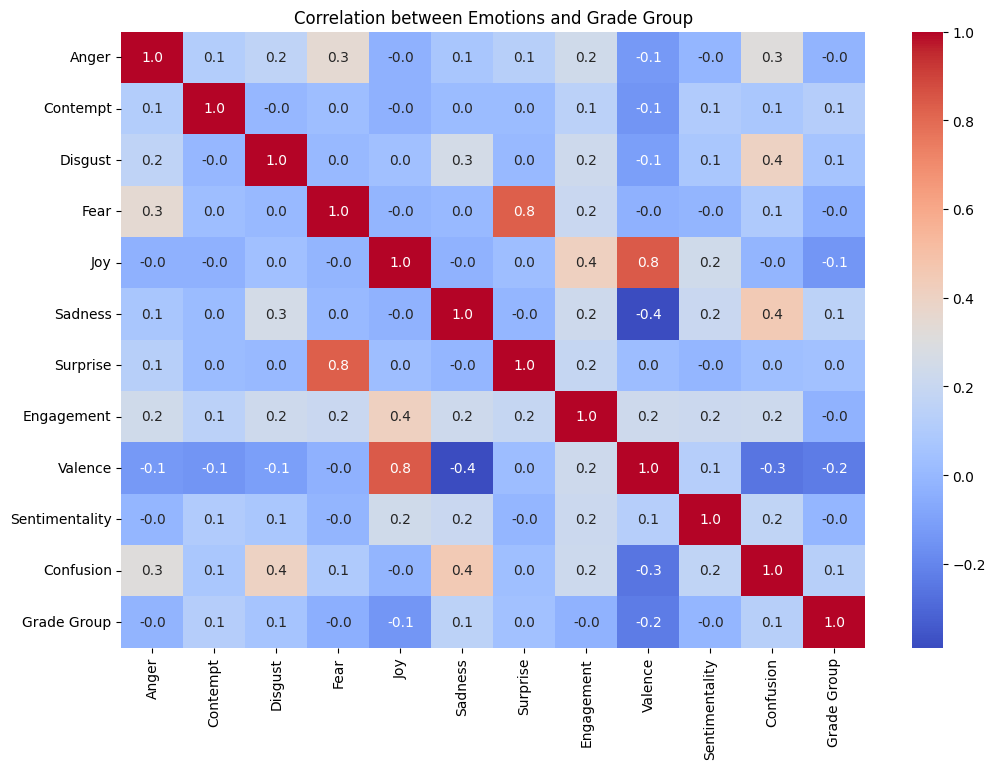

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Engagement', 'Valence', 'Sentimentality', 'Confusion', 'Grade Group']
# Create a copy of the facial_expressions_data DataFrame
data_to_plot = facial_expressions_data.copy()

# Create a subset of the data with only the selected columns
subset_data = data_to_plot[columns_to_plot]

# Convert the 'Grade Group' column to a categorical variable and encode it as numeric
subset_data.loc[:, 'Grade Group'] = pd.Categorical(data_to_plot['Grade Group']).codes

# Plot a heatmap of the correlations between each emotion and the grade group
plt.figure(figsize=(12, 8))
sns.heatmap(subset_data.corr(), cmap='coolwarm', annot=True, fmt='.1f')
plt.title('Correlation between Emotions and Grade Group')
plt.show()


<h2>Random Limited Observations for Each Respondent</h2>

In [9]:
import pandas as pd
from scipy.stats import ttest_ind

from tabulate import tabulate

# Add a new column to the combined_data_with_grades dataframe that indicates whether the grade is above or below 55
facial_expressions_data['Grade Group'] = facial_expressions_data['Grade'].apply(lambda x: 'Above 55' if x > 55 else 'Below 55')

# Describe statistics for each selected column by grade group
selected_columns = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Engagement', 'Valence', 'Sentimentality', 'Confusion', 'Grade Group', 'Respondent']

# Only for selected columns
emotions_data = facial_expressions_data[selected_columns]

# Group the data by the respondent ID and randomly select 1000 observations from each group
sampled_data = emotions_data.groupby('Respondent').apply(lambda x: x.sample(n=1000))

columns_for_calculation = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Engagement', 'Valence', 'Sentimentality', 'Confusion']

# Perform the t-test for each column between the two groups
for col in columns_for_calculation:
    above_55 = sampled_data.loc[sampled_data['Grade Group'] == 'Above 55', col]
    below_55 = sampled_data.loc[sampled_data['Grade Group'] == 'Below 55', col]
    t, pval = ttest_ind(above_55, below_55, equal_var=True)
    print(f'{col}: p-value = {pval:.4f}')


Anger: p-value = 0.5402
Contempt: p-value = 0.0003
Disgust: p-value = 0.2309
Fear: p-value = 0.6831
Joy: p-value = 0.0000
Sadness: p-value = 0.0000
Surprise: p-value = 0.0000
Engagement: p-value = 0.0231
Valence: p-value = 0.0000
Sentimentality: p-value = 0.0012
Confusion: p-value = 0.0000


In [10]:
import pandas as pd
from scipy.stats import ttest_ind

# Select the columns to include in the analysis
selected_columns = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Engagement', 'Valence', 'Sentimentality', 'Confusion']

# Perform the t-test for each selected column between the two groups
results = []
for col in selected_columns:
    above_55 = facial_expressions_data.loc[facial_expressions_data['Grade Group'] == 'Above 55', col]
    below_55 = facial_expressions_data.loc[facial_expressions_data['Grade Group'] == 'Below 55', col]
    t, pval = ttest_ind(above_55, below_55, equal_var=False)

    # Create a descriptive statistics table for the current column
    stats = pd.concat([above_55.describe(), below_55.describe()], axis=1, keys=['Above 55', 'Below 55'])
    
    # Add the t-test result and p-value to the table
    stats.loc['T-test', ''] = t
    stats.loc['P-value', ''] = pval
    
    # Add the table to the results list
    results.append((col, stats))
    
# Display the results
for col, stats in results:
    print(col)
    display(stats)


Anger


,Above 55,Below 55,
count,114898.000000,85053.000000,NaN
mean,1.175176,1.021583,NaN
std,2.986278,4.532532,NaN
min,0.000000,0.005227,NaN
25%,0.150626,0.137562,NaN
50%,0.382434,0.271122,NaN
75%,1.286699,1.072781,NaN
max,94.093216,95.615936,NaN
T-test,NaN,NaN,8.597457e+00
P-value,NaN,NaN,8.233426e-18


Contempt


,Above 55,Below 55,
count,114898.000000,85053.000000,NaN
mean,0.872354,3.702484,NaN
std,7.004527,15.968673,NaN
min,0.000000,0.000010,NaN
25%,0.172347,0.193242,NaN
50%,0.191282,0.199710,NaN
75%,0.194308,0.237162,NaN
max,98.121033,99.885056,NaN
T-test,NaN,NaN,-48.357952
P-value,NaN,NaN,0.000000


Disgust


,Above 55,Below 55,
count,114898.000000,85053.000000,NaN
mean,0.476828,1.058231,NaN
std,3.249492,6.588517,NaN
min,0.000000,0.001022,NaN
25%,0.025133,0.024982,NaN
50%,0.046093,0.074297,NaN
75%,0.476515,0.601599,NaN
max,93.648643,98.447075,NaN
T-test,NaN,NaN,-2.369090e+01
P-value,NaN,NaN,8.842982e-124


Fear


,Above 55,Below 55,
count,114898.000000,85053.000000,NaN
mean,1.262833,0.851512,NaN
std,4.807754,4.388537,NaN
min,0.000000,0.005498,NaN
25%,0.143659,0.130979,NaN
50%,0.322020,0.157835,NaN
75%,0.922746,0.738984,NaN
max,95.832893,98.174744,NaN
T-test,NaN,NaN,1.989095e+01
P-value,NaN,NaN,5.984390e-88


Joy


,Above 55,Below 55,
count,114898.000000,85053.000000,NaN
mean,5.280946,0.463968,NaN
std,21.258240,5.654144,NaN
min,0.000000,0.024032,NaN
25%,0.024215,0.024070,NaN
50%,0.024778,0.024150,NaN
75%,0.029625,0.024675,NaN
max,99.979660,99.979385,NaN
T-test,NaN,NaN,73.381129
P-value,NaN,NaN,0.000000


Sadness


,Above 55,Below 55,
count,114898.000000,85053.000000,NaN
mean,0.308142,2.377133,NaN
std,2.744044,9.858298,NaN
min,0.000000,0.005283,NaN
25%,0.121306,0.127796,NaN
50%,0.126673,0.130985,NaN
75%,0.128209,0.157584,NaN
max,82.758331,99.033897,NaN
T-test,NaN,NaN,-59.523917
P-value,NaN,NaN,0.000000


Surprise


,Above 55,Below 55,
count,114898.000000,85053.000000,NaN
mean,0.567451,0.975160,NaN
std,3.967397,5.497613,NaN
min,0.000000,0.055296,NaN
25%,0.057349,0.057442,NaN
50%,0.068751,0.067909,NaN
75%,0.153484,0.236170,NaN
max,99.069252,99.973244,NaN
T-test,NaN,NaN,-1.837447e+01
P-value,NaN,NaN,2.555222e-75


Engagement


,Above 55,Below 55,
count,114898.000000,85053.000000,NaN
mean,28.913579,26.914872,NaN
std,33.464980,32.038834,NaN
min,0.000000,0.328766,NaN
25%,0.328766,0.328766,NaN
50%,5.333371,3.274225,NaN
75%,62.545034,61.057602,NaN
max,99.981064,99.981064,NaN
T-test,NaN,NaN,1.353207e+01
P-value,NaN,NaN,1.058126e-41


Valence


,Above 55,Below 55,
count,114898.000000,85053.000000,NaN
mean,5.747280,-3.632430,NaN
std,22.143959,14.221341,NaN
min,-67.881241,-99.746422,NaN
25%,0.000000,0.000000,NaN
50%,0.000000,0.000000,NaN
75%,0.000000,0.000000,NaN
max,99.967102,99.824570,NaN
T-test,NaN,NaN,115.059194
P-value,NaN,NaN,0.000000


Sentimentality


,Above 55,Below 55,
count,114898.000000,85053.000000,NaN
mean,1.289762,1.124989,NaN
std,6.542023,5.118820,NaN
min,0.000000,0.000153,NaN
25%,0.016146,0.015831,NaN
50%,0.070743,0.055527,NaN
75%,0.355251,0.277005,NaN
max,99.858139,81.888107,NaN
T-test,NaN,NaN,6.316170e+00
P-value,NaN,NaN,2.686877e-10


Confusion


,Above 55,Below 55,
count,114898.000000,85053.000000,NaN
mean,0.415996,1.655094,NaN
std,3.113740,6.249342,NaN
min,0.000000,0.000285,NaN
25%,0.021938,0.123183,NaN
50%,0.060421,0.317039,NaN
75%,0.170230,0.810947,NaN
max,96.389641,94.985863,NaN
T-test,NaN,NaN,-53.147486
P-value,NaN,NaN,0.000000


In [11]:
import pandas as pd
from scipy.stats import ttest_ind

# Group the data by the respondent ID and randomly select 1000 observations from each group
sampled_data = facial_expressions_data.groupby('Respondent').apply(lambda x: x.sample(n=1000))

columns_for_calculation = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Engagement', 'Valence', 'Sentimentality', 'Confusion']

# Perform the t-test for each column between the two groups
for col in columns_for_calculation:
    above_55 = sampled_data.loc[sampled_data['Grade Group'] == 'Above 55', col]
    below_55 = sampled_data.loc[sampled_data['Grade Group'] == 'Below 55', col]
    t, pval = ttest_ind(above_55, below_55, equal_var=False)
    print(f'{col}: p-value = {pval:.4f}')

    # Describe the statistics for each group
    above_55_stats = above_55.describe()
    below_55_stats = below_55.describe()

    # Print the statistics for each group
    print('Above 55:')
    print(above_55_stats)
    print('Below 55:')
    print(below_55_stats)


Anger: p-value = 0.2164
Above 55:
count    2000.000000
mean        1.208335
std         2.973547
min         0.000000
25%         0.165276
50%         0.562864
75%         1.312291
max        54.526943
Name: Anger, dtype: float64
Below 55:
count    2000.000000
mean        1.059347
std         4.493873
min         0.024736
25%         0.138154
50%         0.351465
75%         1.218729
max        94.825134
Name: Anger, dtype: float64
Contempt: p-value = 0.0000
Above 55:
count    2000.000000
mean        1.339851
std         9.100319
min         0.000000
25%         0.182423
50%         0.192723
75%         0.195844
max        97.949257
Name: Contempt, dtype: float64
Below 55:
count    2000.000000
mean        3.324689
std        15.231271
min         0.000010
25%         0.191124
50%         0.194823
75%         0.212655
max        99.883743
Name: Contempt, dtype: float64
Disgust: p-value = 0.0879
Above 55:
count    2000.000000
mean        0.575055
std         3.667387
min         0.000000

<h3>P-Value on Random Data From Each Respondent</h3>

[Text(0, 0, 'Anger'),
 Text(1, 0, 'Contempt'),
 Text(2, 0, 'Disgust'),
 Text(3, 0, 'Fear'),
 Text(4, 0, 'Joy'),
 Text(5, 0, 'Sadness'),
 Text(6, 0, 'Surprise'),
 Text(7, 0, 'Engagement'),
 Text(8, 0, 'Valence'),
 Text(9, 0, 'Sentimentality'),
 Text(10, 0, 'Confusion')]

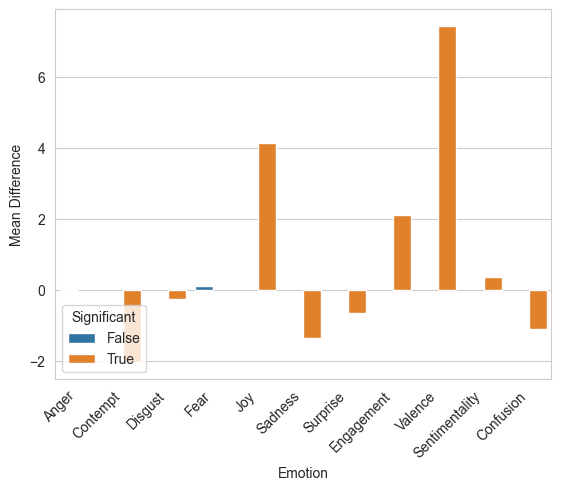

In [12]:
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind

# Group the data by the respondent ID and randomly select 1000 observations from each group
sampled_data = facial_expressions_data.groupby('Respondent').apply(lambda x: x.sample(n=5000))

# Perform the t-test for each column between the two groups
results = []
for col in columns_for_calculation:
        above_55 = sampled_data.loc[sampled_data['Grade Group'] == 'Above 55', col]
        below_55 = sampled_data.loc[sampled_data['Grade Group'] == 'Below 55', col]
        t, pval = ttest_ind(above_55, below_55, equal_var=True)
        if pval <= 0.05:
            sig = True
        else:
            sig = False
        mean_diff = above_55.mean() - below_55.mean()
        results.append({'Emotion': col, 'Mean Difference': mean_diff, 'Significant': sig})

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Visualize the results using a bar plot
sns.set_style("whitegrid")
ax = sns.barplot(x="Emotion", y="Mean Difference", hue="Significant", data=results_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


<h3>Save Dataset to File</h3>

In [13]:
import datetime

# Get current date and time as string
now = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Define filename with timestamp
filename = f"sampled_data_{now}.csv"

# Save sampled_data to file
sampled_data.to_csv(filename, index=False)


<h2>Random Forest for Grade Group on the Random Sample Size</h2>

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
from sklearn.metrics import classification_report
import pickle

# Select only some features
datatset = sampled_data[selected_columns + ['Grade Group']]

# Split the data into training and testing sets
X = datatset.drop('Grade Group', axis=1)
y = datatset['Grade Group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict the test set
y_pred = clf.predict(X_test)

# Save the trained classifier to a file
with open(f'random_forest_classifier_{now}.pkl', 'wb') as f:
    pickle.dump(clf, f)

# Print the accuracy score
print("Accuracy score:", accuracy_score(y_test, y_pred))

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

# Evaluate the model
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate TPR, FPR, TNR, FNR
tnr = tn / (tn + fp)
tpr = tp / (tp + fn)
fnr = fn / (fn + tp)
fpr = fp / (fp + tn)

# Calculate precision
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)


Accuracy score: 0.94775
              precision    recall  f1-score   support

    Above 55       0.94      0.95      0.95      1999
    Below 55       0.95      0.94      0.95      2001

    accuracy                           0.95      4000
   macro avg       0.95      0.95      0.95      4000
weighted avg       0.95      0.95      0.95      4000

Confusion matrix:
[[1909   90]
 [ 119 1882]]
Precision: [0.9413215  0.95436105]


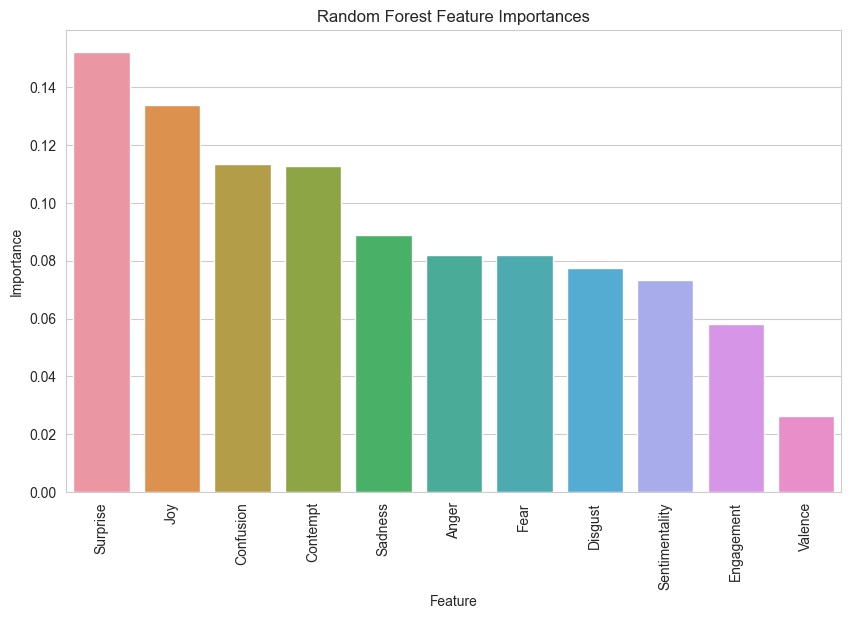

In [15]:
# Get the feature importances
importances = clf.feature_importances_
features = X.columns

# Sort the importances in descending order
sorted_importances = sorted(zip(importances, features), reverse=True)

# Extract the sorted feature importances and feature names
sorted_feature_importances = [x[0] for x in sorted_importances]
sorted_feature_names = [x[1] for x in sorted_importances]

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_feature_names, y=sorted_feature_importances)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()

<h2>Test the Model on the Full Data</h2>

In [16]:
import pandas as pd
import pickle
from datetime import datetime
from sklearn.metrics import confusion_matrix, precision_score

# Load the saved model from the pickle file
with open(f'random_forest_classifier_{now}.pkl', 'rb') as f:
    model = pickle.load(f)

# Extract the features from the full data
features = facial_expressions_data[selected_columns]

# Make predictions on the features using the loaded model
predictions = model.predict(features)

# Compare the predicted grade group labels with the pre-labeled grade group labels
correct_predictions = sum(predictions == facial_expressions_data['Grade Group']) 
accuracy = correct_predictions / len(facial_expressions_data)
print(f"Accuracy on new data: {accuracy}")

# Print the accuracy score
print("Accuracy score:", accuracy_score(facial_expressions_data['Grade Group'], predictions))

# Print the classification report
print(classification_report(facial_expressions_data['Grade Group'], predictions))

# Print the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(facial_expressions_data['Grade Group'], predictions))

# Evaluate the model
tn, fp, fn, tp = confusion_matrix(facial_expressions_data['Grade Group'], predictions).ravel()

# Calculate TPR, FPR, TNR, FNR
tnr = tn / (tn + fp)
tpr = tp / (tp + fn)
fnr = fn / (fn + tp)
fpr = fp / (fp + tn)

# Calculate precision
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)


Accuracy on new data: 0.95667438522438
Accuracy score: 0.95667438522438
              precision    recall  f1-score   support

    Above 55       0.97      0.96      0.96    114898
    Below 55       0.94      0.95      0.95     85053

    accuracy                           0.96    199951
   macro avg       0.96      0.96      0.96    199951
weighted avg       0.96      0.96      0.96    199951

Confusion matrix:
[[110143   4755]
 [  3908  81145]]
Precision: [0.9413215  0.95436105]


In [17]:
print('FPR: ', fpr)
print('TPR: ', tpr)
print('FNR: ', fnr)
print('TNR: ', tnr)

FPR:  0.0413845323678393
TPR:  0.9540521792294216
FNR:  0.045947820770578345
TNR:  0.9586154676321607


<h3>Cross Validation Check</h3>

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import pickle

# Select only some features
datatset = sampled_data[selected_columns + ['Grade Group']]

# Split the data into training and testing sets
X = datatset.drop('Grade Group', axis=1)
y = datatset['Grade Group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform k-fold cross-validation on the training set
scores = cross_val_score(clf, X_train, y_train, cv=5)

# Print the cross-validation scores
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")

# Fit the classifier to the training set
clf.fit(X_train, y_train)

# Predict the test set
y_pred = clf.predict(X_test)

# Save the trained classifier to a file
with open(f'random_forest_classifier_{now}.pkl', 'wb') as f:
    pickle.dump(clf, f)

# Print the accuracy score
print("Accuracy score:", accuracy_score(y_test, y_pred))

# Print the classification report
print(classification_report(y_test, y_pred))


Cross-validation scores: [0.9375    0.9390625 0.9378125 0.9346875 0.9478125]
Mean cross-validation score: 0.9393750000000001
Accuracy score: 0.94775
              precision    recall  f1-score   support

    Above 55       0.94      0.95      0.95      1999
    Below 55       0.95      0.94      0.95      2001

    accuracy                           0.95      4000
   macro avg       0.95      0.95      0.95      4000
weighted avg       0.95      0.95      0.95      4000



<h3>Shap Features Analysis</h3>

In [19]:
# import shap

# # Calculate SHAP values
# explainer = shap.TreeExplainer(clf)
# shap_values = explainer.shap_values(X)

# # Plot summary plot
# shap.summary_plot(shap_values, X, plot_type="bar")
